In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import json

In [2]:
file = open('metas/protocol1/test_label.json', 'r')
file = file.read()
data_dict = json.loads(file)

# In ra từ điển đã chuyển đổi
data_dict['Data/test/5162/live/494421.png'][40]

0

In [11]:
# Data/train/997/live/001150.jpg
name = "/media/quocviet/SSD Data/Viet_FAS/CelebA_Spoof/Data/test/4930/live/494536"
image_path = name + '.png'
txt_path = name + '_BB.txt'

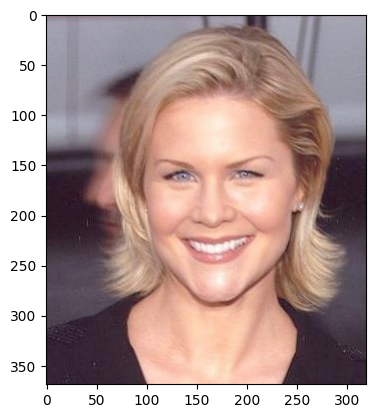

In [12]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [13]:
file = open(txt_path, "r")
annotations = file.read().split("\n")[0].split(" ")
box = []
scoce = float(annotations[-1])
for i in annotations[:-1]:
    box.append(int(i))
real_h,real_w = image.shape[:2]
min_size = min(real_h, real_w)
max_size = max(real_h, real_w)
pen_size = min_size // 15
box[0] = int(box[0]*(real_w / 224))        # x
box[1] = int(box[1]*(real_h / 224))        # y
box[2] = int(box[2]*(real_w / 224))        # w
box[3] = int(box[3]*(real_h / 224))        # h

a = box[0] + box[2]//2
b = box[1] + box[3]//2
r = max_size + pen_size
if a - r // 2 < 0 or b - r // 2 < 0:
    r = min(a, b) * 2
box[0] = max(0, a - r//2)
box[1] = max(0, b - r//2)
box[2] = r
box[3] = r

box, scoce

([0, 16, 336, 336], 0.99950194)

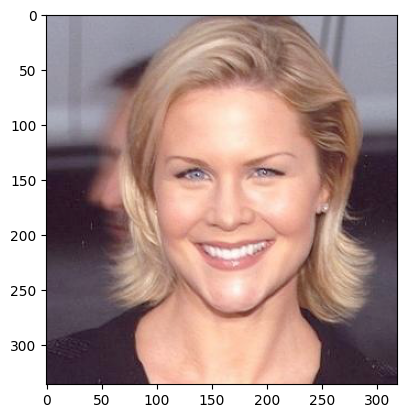

In [14]:
end_h = min(box[1]+ box[3], real_h)
end_w = min(box[2]+ box[0], real_w)
face = image[box[1]: end_h, box[0]:end_w]
# face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [15]:
face.shape

(336, 319, 3)

### Hàm lấy khuôn mặt

In [16]:
# G:/Viet_FAS/CelebA_Spoof/ 
# Data/test/5162/live/494421.png
def get_face(path):
    image_path = '/media/quocviet/SSD Data/Viet_FAS/CelebA_Spoof/' + path
    txt_path = image_path.replace('.png', '_BB.txt')
    # print(image_path)
    image = cv2.imread(image_path)
    real_h,real_w = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    file = open(txt_path, "r")
    annotations = file.read().split("\n")[0].split(" ")
    box = []
    scoce = float(annotations[-1])
    for i in annotations[:-1]:
        box.append(int(i))
    real_h,real_w = image.shape[:2]
    min_size = min(real_h, real_w)
    max_size = max(real_h, real_w)
    pen_size = min_size // 15
    box[0] = int(box[0]*(real_w / 224))        # x
    box[1] = int(box[1]*(real_h / 224))        # y
    box[2] = int(box[2]*(real_w / 224))        # w
    box[3] = int(box[3]*(real_h / 224))        # h

    a = box[0] + box[2]//2
    b = box[1] + box[3]//2
    r = max_size + pen_size
    if a - r // 2 < 0 or b - r // 2 < 0:
        r = min(a, b) * 2
    box[0] = max(0, a - r//2)
    box[1] = max(0, b - r//2)
    box[2] = r
    box[3] = r
    
    end_h = min(box[1]+ box[3], real_h)
    end_w = min(box[2]+ box[0], real_w)
    face = image[box[1]: end_h, box[0]:end_w]
    # face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    return face

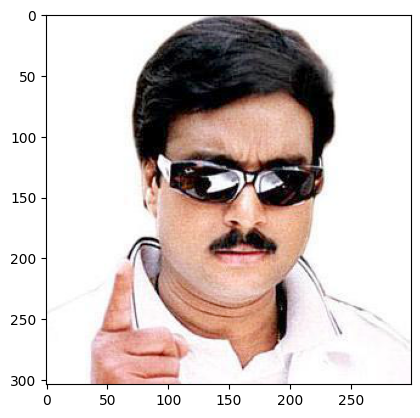

In [17]:
face = get_face('Data/test/5162/live/494421.png')
plt.imshow(face)

### Vòng lặp cắt mặt

In [45]:
# "test/4930/spoof/495600"
# 'Data/test/5162/live/494421.png'
df = pd.DataFrame(columns=['face_path', 'spoof type'])
list_path = data_dict.keys()

for path in list_path:
    try:
        face = get_face(path)
    except:
        continue
    value = data_dict[path]
    spoof_type = int(value[40])
    label_type = int(value[43])
    name = path.split('/')[-1].replace('.png', "")
    if label_type == 1:
        face_path = '/media/quocviet/SSD Data/Viet_FAS/CelebA_Spoof/image_preprocessed/spoof_face/' + name + '.png'
    else:
        face_path = '/media/quocviet/SSD Data/Viet_FAS/CelebA_Spoof/image_preprocessed/live_face/' + name + '.png'
    if spoof_type == 10:
        continue
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    cv2.imwrite(face_path, face)
    df.loc[len(df)] = [face_path, spoof_type]

In [11]:
df

,face_path,spoof type
0,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,4
1,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,3
2,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,3
3,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/li...,0
4,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,3
...,...,...
25753,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/li...,0
25754,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,4
25755,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,4
25756,G:/Viet_FAS/CelebA_Spoof/image_preprocessed/sp...,4


In [12]:
df.to_csv('G:/Viet_FAS/CelebA_Spoof/image_preprocessed/annotation/test_annotation.csv', index=False)